# Community Clustering (Louvain)

## Facebook Data

In [1]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import scipy as sp

The cell below is the same code used in the project.ipynb in the github, just repasted to show that it's the same

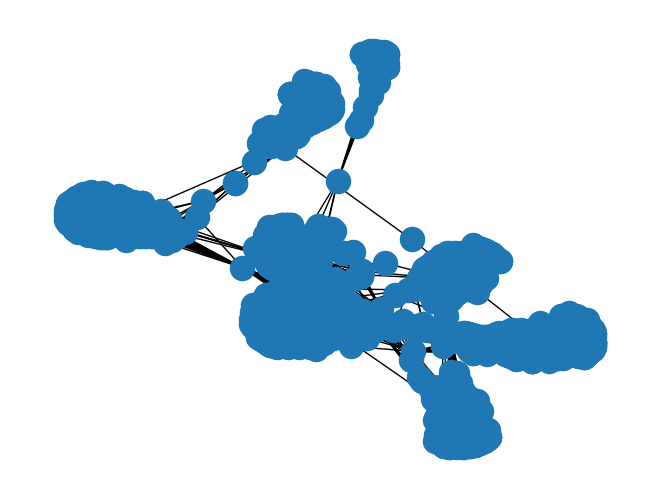

In [2]:
df = pd.read_csv('facebook.txt', delimiter=' ')
edges_list = [(df.iloc[i, 0], df.iloc[i, 1]) for i in range(len(df))]
edges_list.append((0, 1))

G = nx.Graph()
G.add_edges_from(edges_list)

ego_nodes = [1684, 1912, 3437, 3980, 0, 107, 348, 414, 686, 968]
nx.draw(G)

In [9]:
degree_dict = dict(G.degree())

### Messing around with graph visualization (don't have to use, was just testing stuff out)

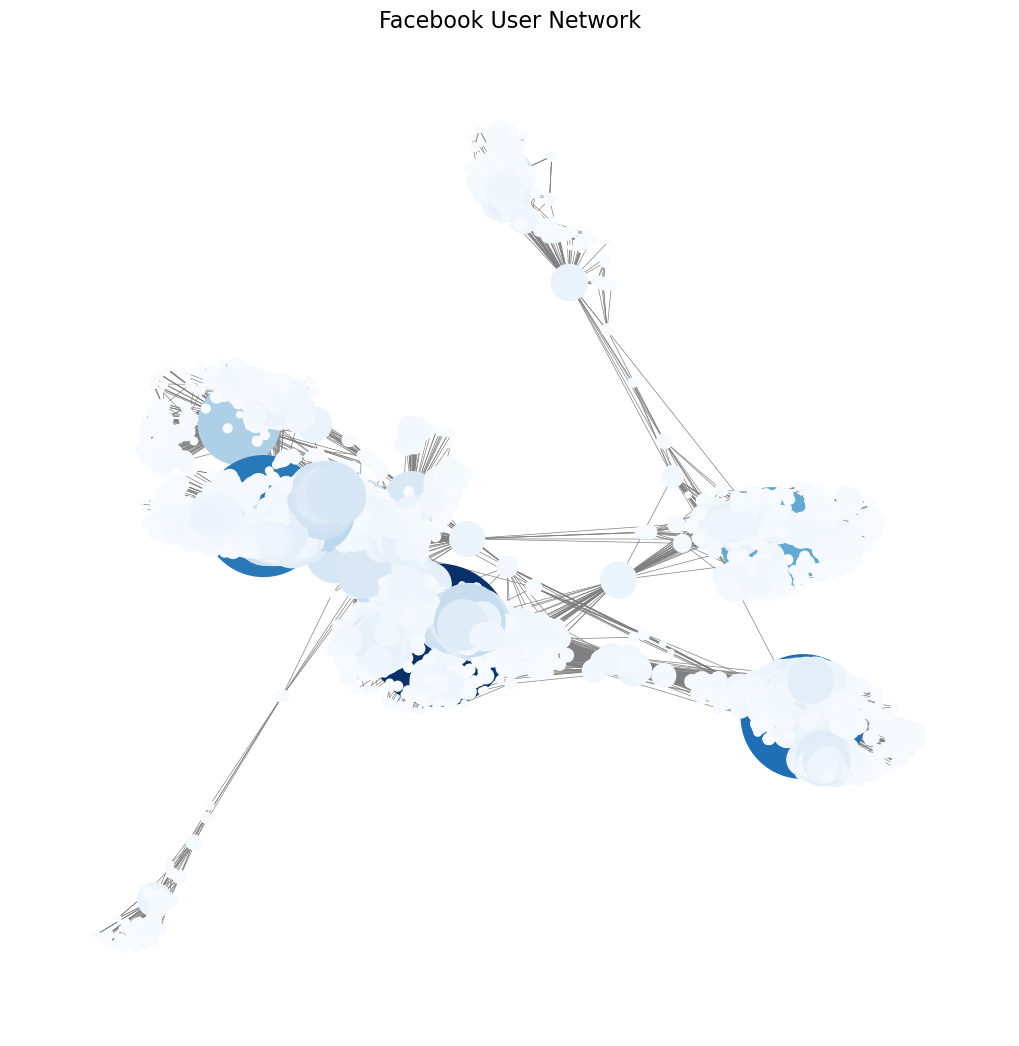

In [15]:
node_colors = [degree_dict[node] for node in G.nodes()]
node_sizes = [v * 10 for v in degree_dict.values()] # trying to show node degree w size and color
plt.figure(figsize=(10, 10)) 
nx.draw(
    G, 
    node_color=node_colors, 
    node_size=node_sizes, 
    with_labels=False,  # no labels, there's too many nodes for that to be useful
    cmap=plt.cm.Blues,  
    edge_color='gray', 
    width=0.5 
)
plt.title("Facebook User Network", fontsize=16)
plt.show()

### Clustering

In [3]:
communities = list(nx.community.louvain_communities(G))

In [4]:
modularity = nx.algorithms.community.modularity(G, communities)
print(f'modularity of partition is {modularity:.4f}')

modularity of partition is 0.8350


In [5]:
bridge_nodes = set()
for comm1 in range(len(communities)):
    for comm2 in range(comm1 + 1, len(communities)):
        for node1 in communities[comm1]:
            for node2 in communities[comm2]:
                if G.has_edge(node1, node2):
                    bridge_nodes.add(node1)
                    bridge_nodes.add(node2)

In [8]:
num_communities = len(communities)
print(f'{num_communities} communities')

16 communities


### Clustering Visualization

In [13]:
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G) 
colors = [i for i in range(len(communities)) for _ in communities[i]]

<Figure size 1000x1000 with 0 Axes>

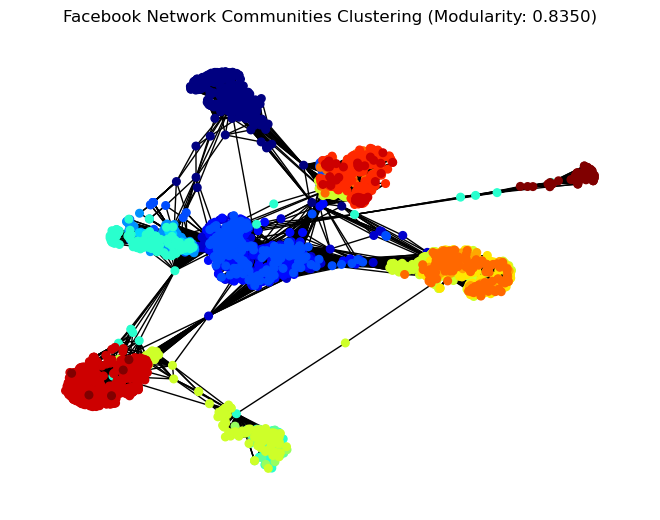

In [7]:
nx.draw(G, pos, node_size=30, node_color=colors, with_labels=False, cmap=plt.cm.jet)
plt.title(f'Facebook Network Communities Clustering (Modularity: {modularity:.4f})')
plt.show()